In [2]:
import numpy as np
import matplotlib.pyplot as plt

## For debugging 

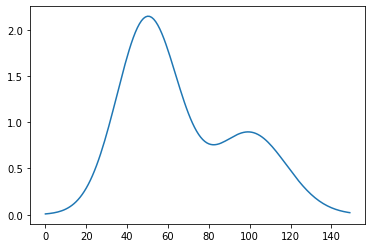

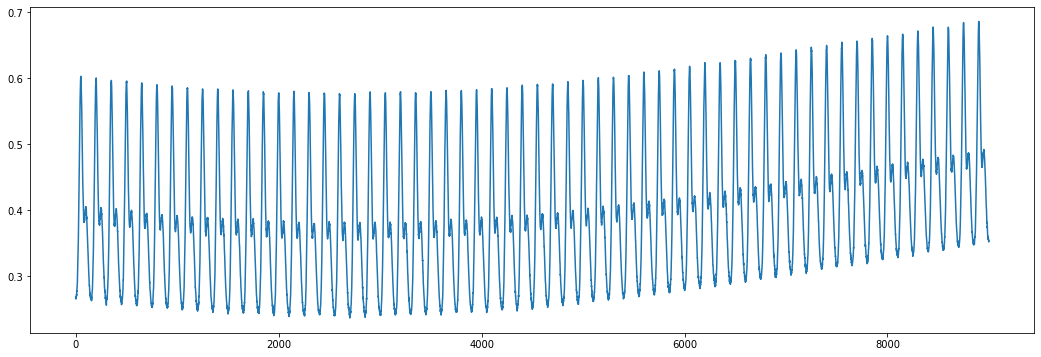

In [3]:
def Gauss (mu, sigma, scale):
    x = np.arange(0, 1.5, 0.01)
    y = (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(x-mu)**2 / (2 * sigma**2)) * scale
    return y

amp = 0.5
phase = 2.3
freq = 0.005
t= np.arange(0,90, 0.01)
lowfreq = amp * np.cos(2*np.pi*freq*t + phase)

y1 = Gauss(0.5, 0.15, 0.8)    
y2 = Gauss(1., 0.18, 0.4)    
yunit = y1 + y2

plt.plot(yunit)

ybatch = np.tile(yunit[None], 60).ravel()
ranNoise = np.random.normal(loc=0.0, scale=0.01,size=9000)
yBatNoise = ybatch + ranNoise + lowfreq


MinRand = yBatNoise.min() - (np.random.rand()+1)
MaxRand = yBatNoise.max() + (np.random.rand()+1)

yBatNorm = (yBatNoise -MinRand) / (MaxRand - MinRand)


plt.figure(figsize=(18, 6))
plt.plot(yBatNorm[:])

In [4]:
def create_data(seed):
    
    np.random.seed(seed)
    amp = 0.5
    phase = 2.3
    freq = 0.005
    t= np.arange(0,90, 0.01)
    lowfreq = amp * np.cos(2*np.pi*freq*t + phase)

    y1 = Gauss(0.5, 0.15, 0.8)    
    y2 = Gauss(1., 0.18, 0.4)    
    yunit = y1 + y2

    ybatch = np.tile(yunit[None], 60).ravel()
    ranNoise = np.random.normal(loc=0.0, scale=0.01,size=9000)
    yBatNoise = ybatch + ranNoise + lowfreq

    MinRand = yBatNoise.min() - (np.random.rand()+1)
    MaxRand = yBatNoise.max() + (np.random.rand()+1)

    yBatNorm = (yBatNoise -MinRand) / (MaxRand - MinRand)
    
    return yBatNorm

## ABP data and hypotension labeling through simulation

In [5]:
def Gauss (mu, sigma, scale):
    x = np.arange(0, 1.5, 0.01)
    y = (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(x-mu)**2 / (2 * sigma**2)) * scale
    return y


def DoSim ():
    amp = np.random.choice(np.arange(0.3, 0.9, 0.01))
    phase = np.random.choice(np.arange(2,6, 0.01))
    freq = np.random.choice([0.002,0.003,0.004,0.005,0.006])
    t= np.arange(0,90, 0.01)
    lowfreq = amp * np.cos(2*np.pi*freq*t + phase)
    
    # Correlation based hypotension labeling 
    if np.corrcoef(lowfreq, np.arange(0, 9000))[0,1] > 0:
        hypo = np.array([[0]])
    else:
        hypo = np.array([[1]])
        

    m1 = np.random.choice(np.arange(0.45, 0.55, 0.01))
    m2 = np.random.choice(np.arange(0.95, 1.05, 0.01))
    s1 = np.random.choice(np.arange(0.12, 0.16, 0.01))
    s2 = np.random.choice(np.arange(0.14, 0.18, 0.01))

    y1 = Gauss(m1, s1, 0.8)    
    y2 = Gauss(m2, s2, 0.4)    
    yunit = y1 + y2

    ybatch = np.tile(yunit[None], 60).ravel()
    ranNoise = np.random.normal(loc=0.0, scale=0.01,size=9000)
    yBatNoise = ybatch + ranNoise + lowfreq

    MinRand = yBatNoise.min() - (np.random.rand()+1)
    MaxRand = yBatNoise.max() + (np.random.rand()*3 )

    yBatNorm = (yBatNoise -MinRand) / (MaxRand - MinRand)


    #plt.figure(figsize=(18, 6))
    #plt.plot(yBatNorm[:])
    
    return yBatNorm[None], hypo

### Generate simulation data

In [6]:
def generate_simdata(n): # n : number of generated data

    ABPInp = []
    HypoOut = []

    for i in range(n):

        res = DoSim()
        ABPInp.append(res[0])
        HypoOut.append(res[1])

    ABPInp = np.concatenate(ABPInp, axis=0)
    HypoOut = np.concatenate(HypoOut, axis=0)
    
    return ABPInp, HypoOut

In [8]:
# 1000 sample data for training
ABPInp_Train, HypoOut_Train = generate_simdata(1000) 
np.save('../ProcessedData/ABPInp_Train.npy', ABPInp_Train)
np.save('../ProcessedData/HypoOut_Train.npy', HypoOut_Train)

In [9]:
# 500 sample data for validation
ABPInp_Val, HypoOut_Val = generate_simdata(500)
np.save('../ProcessedData/ABPInp_Val.npy', ABPInp_Val)
np.save('../ProcessedData/HypoOut_Val.npy', HypoOut_Val)

([<matplotlib.lines.Line2D at 0x19fccfc54c0>], array([0]))

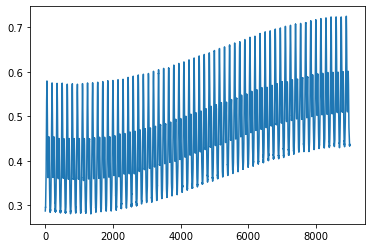

In [10]:
idx = 6
plt.plot(ABPInp_Train[idx]), HypoOut_Train[idx]